<a href="https://colab.research.google.com/github/popuricharan666/Sentiment-Analysis/blob/main/Major_Project_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/MyDrive/data.csv')

In [ ]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['review'] = df['review'].apply(remove_punctuations)
df

,review,rating
0,It was nice produt I like its design a lot It...,5
1,awesome soundvery pretty to see this nd the so...,5
2,awesome sound quality pros 78 hrs of battery l...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever usedREAD MORE,5


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['review']

0       [it, was, nice, produt, i, like, its, design, ...
1       [awesome, soundvery, pretty, to, see, this, nd...
2       [awesome, sound, quality, pros, 78, hrs, of, b...
3       [i, think, it, is, such, a, good, product, not...
4       [awesome, bass, sound, quality, very, good, be...
                              ...                        
9971                                     [goodread, more]
9972    [everything, is, amazimg, but, the, built, is,...
9973                                     [goodread, more]
9974     [best, headphone, i, have, ever, usedread, more]
9975                                     [niceread, more]
Name: review, Length: 9976, dtype: object

In [ ]:
# def removestopwords(s):
#   words=[i for i in s if i not in stopwords.words('english')]
#   print(words)
#   return words

# df['review']=df['review'].apply(lambda x: removestopwords(x))
# df['review']

# #takes lots of time here so be patient here

In [ ]:
stopwords.words("english")

In [ ]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values
print(x)
print(y)

[list(['it', 'was', 'nice', 'produt', 'i', 'like', 'its', 'design', 'a', 'lot', 'its', 'easy', 'to', 'carry', 'and', 'looked', 'stylishread', 'more'])
 list(['awesome', 'soundvery', 'pretty', 'to', 'see', 'this', 'nd', 'the', 'sound', 'quality', 'was', 'too', 'good', 'i', 'wish', 'to', 'take', 'this', 'product', 'loved', 'this', 'product', 'read', 'more'])
 list(['awesome', 'sound', 'quality', 'pros', '78', 'hrs', 'of', 'battery', 'life', 'including', '45', 'mins', 'approx', 'call', 'timeawesome', 'sound', 'output', 'bass', 'and', 'treble', 'are', 'really', 'very', 'clear', 'without', 'equaliser', 'with', 'equaliser', 'sound', 'wary', 'depends', 'on', 'the', 'handset', 'sound', 'qualityweightless', 'to', 'carry', 'and', 'in', 'head', 'toomic', 'is', 'good', 'but', 'in', 'traffic', 'it', 'is', 'not', 'too', 'good', '325535mm', 'option', 'is', 'really', 'important', 'to', 'mention', 'really', 'expecting', 'other', 'leading', 'brands', 'to', 'implement', 'thisconsvery', 'tight', 'in', 'ea

In [ ]:
len(x)

9976

In [ ]:
def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

x = vectorizer.fit_transform(x)

In [ ]:
#x_trans = x_hat.transform(x)

In [ ]:
x = x.toarray()

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0,stratify = y)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7482, 9932)
(7482,)
(2494, 9932)
(2494,)


In [ ]:
np.unique(y_train)

array([1, 2, 3, 4, 5])

In [ ]:
y_train_1 = keras.utils.to_categorical(y_train)
y_test_1 = keras.utils.to_categorical(y_test)

In [ ]:
y_train_1 = y_train_1[:, 1:]
y_test_1 = y_test_1[:, 1:]

In [ ]:
y_train_1.shape

(7482, 5)

In [ ]:
y_test_1.shape

(2494, 5)

In [ ]:
model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 9932)              39728     
_________________________________________________________________
dense (Dense)                (None, 100)               993300    
_________________________________________________________________
p_re_lu (PReLU)              (None, 100)               100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 50)                5

In [ ]:
history = model.fit(x_train, y_train_1, validation_data=(x_test, y_test_1), epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
234/234 [==============================] - 6s 18ms/step - loss: 1.5426 - accuracy: 0.4361 - val_loss: 1.0920 - val_accuracy: 0.5742
Epoch 2/50
234/234 [==============================] - 4s 17ms/step - loss: 0.7149 - accuracy: 0.7451 - val_loss: 0.9594 - val_accuracy: 0.6179
Epoch 3/50
234/234 [==============================] - 4s 16ms/step - loss: 0.5322 - accuracy: 0.8083 - val_loss: 1.1935 - val_accuracy: 0.6335
Epoch 4/50
234/234 [==============================] - 4s 17ms/step - loss: 0.4276 - accuracy: 0.8475 - val_loss: 1.6208 - val_accuracy: 0.5553
Epoch 5/50
234/234 [==============================] - 4s 17ms/step - loss: 0.4011 - accuracy: 0.8539 - val_loss: 1.9518 - val_accuracy: 0.4964
Epoch 6/50
234/234 [==============================] - 4s 17ms/step - loss: 0.3723 - accuracy: 0.8610 - val_loss: 1.8781 - val_accuracy: 0.5297
Epoch 7/50
234/234 [==============================] - 4s 17ms/step - loss: 0.3559 - accuracy: 0.8692 - val_loss: 2.7603 - val_accuracy: 0.3472

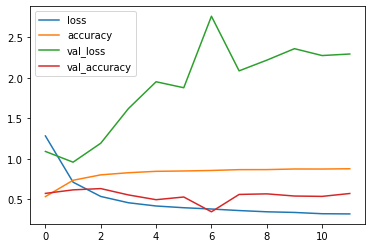

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

In [ ]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.5MB 6.3MB/s 
     |████████████████████████████████| 163kB 49.0MB/s 
     |████████████████████████████████| 112kB 51.9MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 4.6MB 13.7MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 122kB 52.0MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=4a30b38e220f1b4d64b9ca1ccb86161dc6e703451c44b8cdf0d489e0560557c2
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=91b8837f7ddaff31c634f0553ae88299a7b0c9a61c9016c4a44d36a989f1d3af
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/data.csv')

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['review'] = df['review'].apply(remove_punctuations)

tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))

def removestopwords(s):
  words=[i for i in s if i not in stopwords.words('english')]
  print(words)
  return words

x = df.iloc[:,0].values
y = df.iloc[:,1].values

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

x = vectorizer.fit_transform(x)
x = x.toarray()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05,random_state = 0,stratify = y)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# y = keras.utils.to_categorical(y)
# y = y[:, 1:]

y_train = y_train[:, 1:]
y_test = y_test[:, 1:]

model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics="accuracy")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train,validation_data=(x_test,y_test),
                    epochs=50, callbacks=[early_stopping_cb])

st.title('sentiment analysis')
select = st.text_input('Enter your message')

select = remove_punctuations(select)
select = tokenizer.tokenize(select.lower())

select = vectorizer.transform([select]).toarray()
output = np.argmax(model.predict(select), axis=-1)

st.title(output[0])


Writing app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://fea2195c5082.ngrok.io'

In [ ]:
select = 'I am not at all satisfied'
select = remove_punctuations(select)
select = tokenizer.tokenize(select.lower())
select = vectorizer.transform([select]).toarray()
output = np.argmax(model.predict(select), axis=-1)
print(output[0])


4


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['review'] = df['review'].apply(remove_punctuations)

tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))

def removestopwords(s):
  words=[i for i in s if i not in stopwords.words('english')]
  print(words)
  return words

x = df.iloc[:,0].values
y = df.iloc[:,1].values

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

x = vectorizer.fit_transform(x)
x = x.toarray()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05,random_state = 0,stratify = y)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# y = keras.utils.to_categorical(y)
# y = y[:, 1:]

y_train = y_train[:, 1:]
y_test = y_test[:, 1:]

model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics="accuracy")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train,validation_data=(x_test,y_test),
                    epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
297/297 [==============================] - 12s 33ms/step - loss: 1.5257 - accuracy: 0.4452 - val_loss: 1.0618 - val_accuracy: 0.5832
Epoch 2/50
297/297 [==============================] - 9s 30ms/step - loss: 0.7092 - accuracy: 0.7432 - val_loss: 1.0016 - val_accuracy: 0.6092
Epoch 3/50
297/297 [==============================] - 9s 31ms/step - loss: 0.5407 - accuracy: 0.8012 - val_loss: 1.3660 - val_accuracy: 0.5912
Epoch 4/50
297/297 [==============================] - 9s 31ms/step - loss: 0.4636 - accuracy: 0.8306 - val_loss: 1.8266 - val_accuracy: 0.5150
Epoch 5/50
297/297 [==============================] - 9s 29ms/step - loss: 0.4099 - accuracy: 0.8548 - val_loss: 1.6828 - val_accuracy: 0.6212
Epoch 6/50
297/297 [==============================] - 5s 16ms/step - loss: 0.4027 - accuracy: 0.8511 - val_loss: 1.6746 - val_accuracy: 0.5892
Epoch 7/50
297/297 [==============================] - 5s 16ms/step - loss: 0.3704 - accuracy: 0.8643 - val_loss: 1.7830 - val_accuracy: 0.589